# Recursos

In [ ]:
#Bibliotecas
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Ctes(en metros)
R = 50
RA = 15
RB = 30
Lo = 105
H1 = 115
C = H1 - R - RB
g = 9.81
PASO = 0.01

In [ ]:
avances = np.arange(0, 1, PASO)
rangos = np.tile(avances, 6)

In [ ]:
pd.set_option('display.max_rows', None)

# Confección de la trayectoria (1)

In [ ]:
Xa = np.empty(100, float)
Ya = np.zeros(100, float)

Xb = np.empty(100, float)
Yb = np.empty(100, float)

Xc = np.empty(100, float)
Yc = np.empty(100, float)

Xd = np.empty(100, float)
Yd = np.empty(100, float)

Xe = np.empty(100, float)
Ye = np.empty(100, float)

Xf = np.empty(100, float)
Yf = np.empty(100, float)

In [ ]:
for i in range(100):
  r=(i/100)

  Xa[i] = Lo * r

  Xb[i] = Lo + R*m.cos(r*m.pi/2 - m.pi/2)
  Yb[i] = R + R*m.sin(r*m.pi/2 - m.pi/2)

  Xc[i] = Lo + R
  Yc[i] = R + r*C

for i in range(100):
  r=(i/100)

  Xd[i] = Xc[-1] + RA*(1 + m.cos(m.pi - r*m.pi))
  Yd[i] = R + C + RB*m.sin(m.pi - r*m.pi)

  Xe[i] = Xc[-1] + 2*RA
  Ye[i] = R + C*(1 - r)

for i in range(100):
  r=(i/100)

  Xf[i] = Xe[-1] + R*(1 + m.cos(m.pi + r*m.pi/2))
  Yf[i] = R + R*m.sin(m.pi + r*m.pi/2)

X_points = np.concatenate((Xa, Xb, Xc, Xd, Xe, Xf))
Y_points = np.concatenate((Ya, Yb, Yc, Yd, Ye, Yf))

Tramo = np.array(['A'] * 100 + ['B'] * 100 + ['C'] * 100 + ['D'] *100 + ['E'] * 100 + ['F'] * 100)

In [ ]:
S_points = np.empty(600, float)
S_points[0] = 0.0
for i in range(1, len(X_points)):
  S_points[i] = S_points[i-1] + m.sqrt((X_points[i] - X_points[i-1])**2 + (Y_points[i] - Y_points[i-1])**2)

K_points = np.empty(600, float)
K_points[0] = 0.0
for i in range(1, len(X_points)):
  """if X_points[i] == X_points[i-1]:
   if i <= len(X_points)//2:
      K_points[i] = 1000000
    else:
      K_points[i] = -1000000"""
  if i in range(200, 301):
    K_points[i] = 1e6 # Use a large float instead of a string
  elif i in range(400, 501):
    K_points[i] = -1e6 # Use a large float instead of a string
  elif X_points[i] - X_points[i-1] == 0: # Handle division by zero for vertical segments
      if Y_points[i] - Y_points[i-1] > 0:
          K_points[i] = float('inf')
      else:
          K_points[i] = float('-inf')
  else:
    K_points[i] = (Y_points[i] - Y_points[i-1])/(X_points[i] - X_points[i-1])

In [ ]:
data = np.stack((Tramo, rangos, X_points, Y_points, S_points, K_points), axis=1)
df = pd.DataFrame(data, columns=('Tramo', 'r','X', 'Y', 'S', 'K'))
df['S'] = pd.to_numeric(df['S'])
df['K'] = pd.to_numeric(df['K'], errors='coerce')
df['X'] = pd.to_numeric(df['X'])
df['Y'] = pd.to_numeric(df['Y'])
df

,Tramo,r,X,Y,S,K
0,A,0.0,0.000000,0.000000,0.000000,0.000000
1,A,0.01,1.050000,0.000000,1.050000,0.000000
2,A,0.02,2.100000,0.000000,2.100000,0.000000
3,A,0.03,3.150000,0.000000,3.150000,0.000000
4,A,0.04,4.200000,0.000000,4.200000,0.000000
5,A,0.05,5.250000,0.000000,5.250000,0.000000
6,A,0.06,6.300000,0.000000,6.300000,0.000000
7,A,0.07,7.350000,0.000000,7.350000,0.000000
8,A,0.08,8.400000,0.000000,8.400000,0.000000
9,A,0.09,9.450000,0.000000,9.450000,0.000000


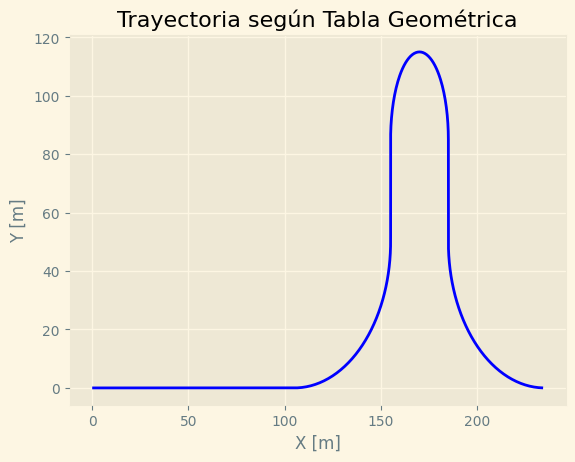

In [ ]:
plt.style.use('Solarize_Light2')
plt.plot(X_points, Y_points, 'blue')
plt.title('Trayectoria según Tabla Geométrica')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.show()

# Resolución Numérica (2a)

In [ ]:
"""
Busca el valor más cercano a 'valor' en la 'columna' especificada del DataFrame global 'df'.

Args:
  df: DataFrame a buscar.
  columna: Nombre de la columna en la que buscar.
  valor: Valor a buscar.

Returns:
  Una tupla que contiene el índice del valor más cercano y el valor encontrado.
"""
def buscar_cercano(df, columna, valor):

  # Calcular la diferencia absoluta entre el valor buscado y los valores en la columna
  diferencias = np.abs(df[columna] - valor)

  # Encontrar el índice del valor más cercano (el que tiene la menor diferencia)
  indice_mas_cercano = diferencias.dropna().idxmin()

  # Obtener el valor más cercano
  Val_mas_cercano = df[columna].iloc[indice_mas_cercano]
  return indice_mas_cercano, Val_mas_cercano

def calc_k(df_traj, S):
  indice, encontrado = buscar_cercano(df_traj, "S", S)

  idx_s0 = max(0, indice - 1)
  idx_s1 = min(len(df_traj) - 1, indice + 1)

  if indice == 0:
      idx_s1 = 1
  elif indice == len(df_traj) - 1:
      idx_s0 = len(df_traj) - 2


  K0 = df_traj['K'].iloc[idx_s0]
  K1 = df_traj['K'].iloc[idx_s1]

  S0 = df_traj['S'].iloc[idx_s0]
  S1 = df_traj['S'].iloc[idx_s1]

  if S1 == S0:
      return K0
  else:
      return K0 + (((K1-K0)/(S1-S0)) * (S-S0))

In [ ]:
def componente_vertical(k):
  return k / m.sqrt(1 + k ** 2)

def en_tramo_a(k):
  return k == 0.0

def ap(k):
  # return 10.744 if en_tramo_a(i) else 0
  return 12.3556 if en_tramo_a(k) else 0 # acá le sume el 15%

S_temporal = [0]
velocidad = [0]
tiempo = [0]
k_temporal = [0]
i = 0

while True:
  s_anterior = S_temporal[-1]
  velocidad_anterior = velocidad[-1]

  s_actual = s_anterior + PASO * velocidad_anterior

  if s_actual > S_points[-1]:
    break

  S_temporal.append(s_actual)

  k = calc_k(df, s_actual)
  k_temporal.append(k)
  ec_4 = -g * componente_vertical(k) + ap(k)

  v_actual = velocidad[-1] + PASO * ec_4

  velocidad.append(v_actual)
  tiempo.append(tiempo[-1] + PASO)
  i += 1


data2 = np.stack((np.array(tiempo), np.array(S_temporal), np.array(velocidad), k_temporal), axis=1)
dft = pd.DataFrame(data2, columns=('t', 'S_temp', 'v', "k_temp"))
dft

,t,S_temp,v,k_temp
0,0.00,0.000000,0.000000,0.000000
1,0.01,0.000000,0.123556,0.000000
2,0.02,0.001236,0.247112,0.000000
3,0.03,0.003707,0.370668,0.000000
4,0.04,0.007413,0.494224,0.000000
5,0.05,0.012356,0.617780,0.000000
6,0.06,0.018533,0.741336,0.000000
7,0.07,0.025947,0.864892,0.000000
8,0.08,0.034596,0.988448,0.000000
9,0.09,0.044480,1.112004,0.000000


In [ ]:
dft_recortado = pd.concat([dft.iloc[0:3], dft.iloc[410:414], dft.iloc[579:583], dft.iloc[677:681], dft.iloc[993:997], dft.iloc[1091:1095], dft.iloc[1258:1261]])
dft_recortado

,t,S_temp,v,k_temp
0,0.00,0.000000,0.000000,0.000000
1,0.01,0.000000,0.123556,0.000000
2,0.02,0.001236,0.247112,0.000000
410,4.10,103.595528,50.657960,0.000000
411,4.11,104.102108,50.781516,0.000000
412,4.12,104.609923,50.781239,0.002824
413,4.13,105.117735,50.780749,0.004997
579,5.79,182.966352,40.154715,635440.876534
580,5.80,183.367899,40.056615,541049.758110
581,5.81,183.768465,39.958515,1000000.000000


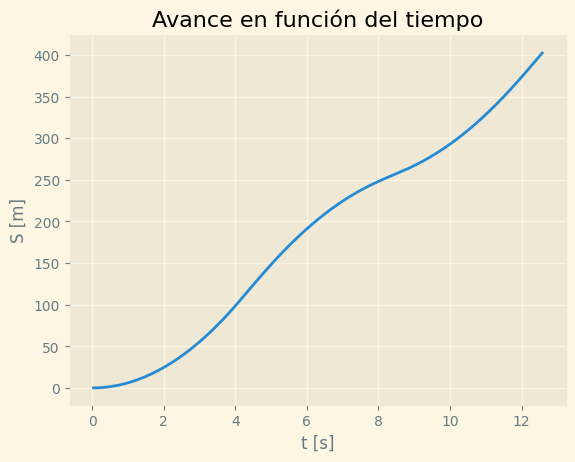

In [ ]:
plt.style.use('Solarize_Light2')
plt.plot(tiempo, S_temporal)
plt.title('Avance en función del tiempo')
plt.xlabel('t [s]')
plt.ylabel('S [m]')
plt.show()

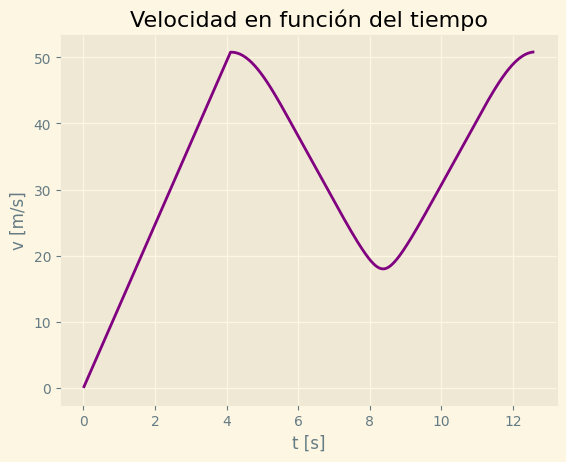

In [ ]:
plt.style.use('Solarize_Light2')
plt.plot(tiempo, velocidad, 'purple')
plt.title('Velocidad en función del tiempo')
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.show()

# Calcular $x_j$ e $y_j$ en base a la trayectoria (2b)



In [ ]:
def calcular_x_y(S_temporal, S_points, X_points, Y_points):
    x_temp = []
    y_temp = []

    for s in S_temporal:
        #Buscar indice
        indice = np.searchsorted(S_points, s)

        #Casos borde
        if indice == 0:
            idx_0 = 0
            idx_1 = 1
        elif indice >= len(S_points):
            idx_0 = len(S_points) - 2
            idx_1 = len(S_points) - 1
        #Casos regulares
        else:
            if abs(S_points[indice] - s) < abs(S_points[indice - 1] - s):
                 idx_0 = indice -1
                 idx_1 = indice
            else:
                 idx_0 = indice - 1
                 idx_1 = indice

        S0 = S_points[idx_0]
        S1 = S_points[idx_1]
        X0 = X_points[idx_0]
        X1 = X_points[idx_1]
        Y0 = Y_points[idx_0]
        Y1 = Y_points[idx_1]

        #Interpolacion
        if S1 != S0:
            X = X0 + ((X1 - X0) / (S1 - S0)) * (s - S0)
            Y = Y0 + ((Y1 - Y0) / (S1 - S0)) * (s - S0)
        else:
            X = X0
            Y = Y0

        x_temp.append(X)
        y_temp.append(Y)

    return np.array(x_temp), np.array(y_temp)


x_temp, y_temp = calcular_x_y(S_temporal,S_points,X_points,Y_points)
data3 = np.stack((np.array(x_temp), np.array(y_temp)), axis=1)
dft2 = pd.DataFrame(data3, columns=('x_temp', 'y_temp'))
dft = pd.concat([dft, dft2], axis=1)
y_max_index = dft['y_temp'].idxmax()
dft

,t,S_temp,v,k_temp,x_temp,y_temp
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.01,0.000000,0.123556,0.000000,0.000000,0.000000
2,0.02,0.001236,0.247112,0.000000,0.001236,0.000000
3,0.03,0.003707,0.370668,0.000000,0.003707,0.000000
4,0.04,0.007413,0.494224,0.000000,0.007413,0.000000
5,0.05,0.012356,0.617780,0.000000,0.012356,0.000000
6,0.06,0.018533,0.741336,0.000000,0.018533,0.000000
7,0.07,0.025947,0.864892,0.000000,0.025947,0.000000
8,0.08,0.034596,0.988448,0.000000,0.034596,0.000000
9,0.09,0.044480,1.112004,0.000000,0.044480,0.000000


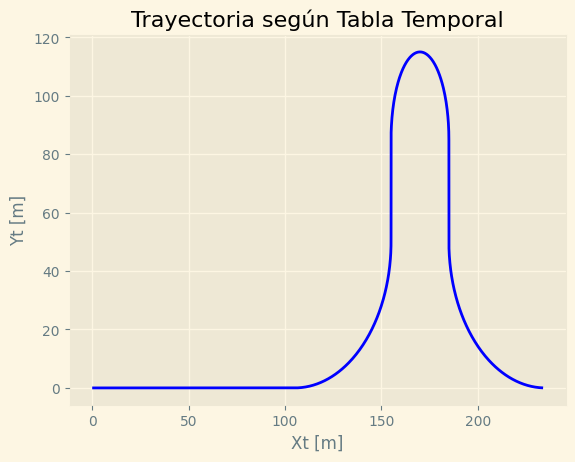

In [ ]:
plt.plot()
plt.style.use('Solarize_Light2')
plt.plot(x_temp, y_temp, 'blue')
plt.title('Trayectoria según Tabla Temporal')
plt.xlabel('Xt [m]')
plt.ylabel('Yt [m]')
plt.show()

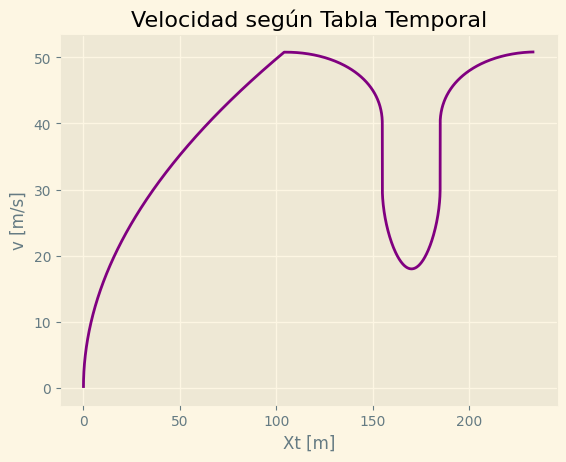

In [ ]:
plt.plot()
plt.style.use('Solarize_Light2')
plt.plot(x_temp, velocidad, 'purple')
plt.title('Velocidad según Tabla Temporal')
plt.xlabel('Xt [m]')
plt.ylabel('v [m/s]')
plt.show()

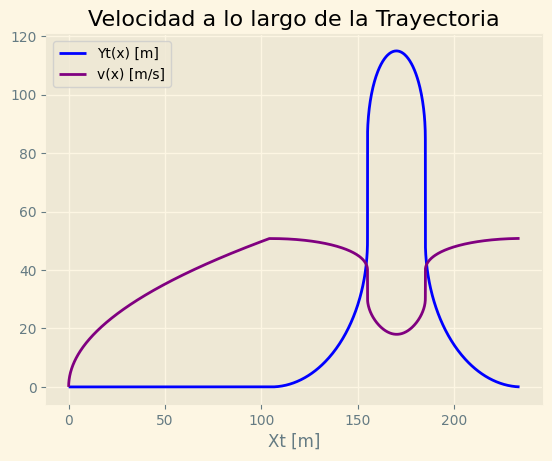

In [ ]:
plt.plot()
plt.style.use('Solarize_Light2')
plt.plot(x_temp, y_temp, 'blue', label='Yt(x) [m]')
plt.plot(x_temp, velocidad, 'purple', label='v(x) [m/s]')
plt.title('Velocidad a lo largo de la Trayectoria')
plt.xlabel('Xt [m]')
plt.legend(loc='upper left')
plt.show()

**Velocidad en el punto más alto**

In [ ]:
velocidad_cima = dft.loc[y_max_index, 'v']
print(f'Velocidad en el punto más alto: {velocidad_cima:.2f} m/s')

Velocidad en el punto más alto: 18.00 m/s


**Velocidad máxima**

In [ ]:
velocidad_max = dft['v'].abs().max()
print(f'Velocidad máxima: {velocidad_max:.2f} m/s')

Velocidad máxima: 50.82 m/s


**Velocidad final**

In [ ]:
velocidad_final = dft['v'].iloc[-1]
print(f'Velocidad final: {velocidad_final:.2f} m/s')

Velocidad final: 50.82 m/s


**Tiempo total del recorrido**

In [ ]:
duracion = dft['t'].iloc[-1]
print(f'Duración del recorrido: {duracion:.2f} segundos')

Duración del recorrido: 12.60 segundos


# Validación de la solución obtenida (3)

Haciendo el despeje llegué a:
$\frac{\text{V(t)}^2}{2} + g \cdot y(t) = \text{cte}$.

Tiene sentido y las unidades dan. El grafico es el siguiente

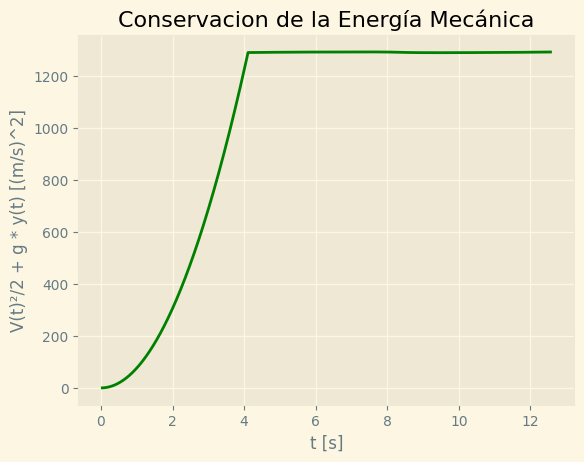

In [ ]:
valores = [] # Acá guardo los valores de la fórmula de arriba

for i in range(len(tiempo)):
  valores.append((velocidad[i] ** 2) / 2 + g * y_temp[i]) # Ahora las unidades dan

plt.plot()
plt.style.use('Solarize_Light2')
plt.plot(tiempo, valores, 'green')
plt.title('Conservacion de la Energía Mecánica')
plt.xlabel('t [s]')
plt.ylabel('V(t)²/2 + g * y(t) [(m/s)^2]')
plt.show()
# En el gráfico se ve como se mantiene constante la cantidad => Se conseva la EM.

# Cálculo de G-Force (4)

In [ ]:
# Calcular y´´
y_prima_prima = [0]

for i in range(1, len(X_points)):
  if i == len(X_points) - 1:
    y_prima_prima.append(y_prima_prima[-1])
    break

  y_anterior = Y_points[i - 1]
  y_actual = Y_points[i]
  y_siguiente = Y_points[i + 1]

  x_anterior = X_points[i - 1]
  x_actual = X_points[i]
  x_siguiente = X_points[i + 1]

  primer_termino = 2 * (y_anterior / ((x_actual - x_anterior) * (x_siguiente - x_anterior)))
  segundo_termino = 2 *(y_actual / ((x_actual - x_anterior) * (x_siguiente - x_actual)))
  tercer_termino = 2 * (y_siguiente / ((x_siguiente - x_actual) * (x_siguiente - x_anterior)))

  y_i = primer_termino - segundo_termino + tercer_termino

  if m.isnan(y_i) and i >= 200 and i <= 300:
    y_prima_prima.append(1000000) # Saltar a +- 1M en este caso está bien?

  elif m.isnan(y_i) and i >= 400 and i <= 500:
    y_prima_prima.append(-1000000)

  else:
    y_prima_prima.append(y_i)


/tmp/ipython-input-24-2676596339.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  segundo_termino = 2 *(y_actual / ((x_actual - x_anterior) * (x_siguiente - x_actual)))
/tmp/ipython-input-24-2676596339.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  tercer_termino = 2 * (y_siguiente / ((x_siguiente - x_actual) * (x_siguiente - x_anterior)))
/tmp/ipython-input-24-2676596339.py:21: RuntimeWarning: invalid value encountered in scalar add
  y_i = primer_termino - segundo_termino + tercer_termino
/tmp/ipython-input-24-2676596339.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  primer_termino = 2 * (y_anterior / ((x_actual - x_anterior) * (x_siguiente - x_anterior)))
/tmp/ipython-input-24-2676596339.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  y_i = primer_termino - segundo_termino + tercer_termino


In [ ]:
# Calcular radio de curvatura
radio_curvatura = []

for i, y_prima in enumerate(K_points):
  if y_prima_prima[i] == 0:
    radio_curvatura.append(1000000)
  else:
    radio_actual = ((1 + y_prima ** 2) ** (3 / 2)) / y_prima_prima[i]
    radio_curvatura.append(radio_actual)

In [ ]:
# En este caso creo que si está bien pisar df porq sino se rompe buscar_cercano para interpolar. Sino, hacer que la función reciba el DataFrame y listo
data = np.stack((np.array(Tramo, copy=True), np.array(rangos, copy=True), np.array(X_points, copy=True), np.array(Y_points, copy=True), np.array(S_points, copy=True), np.array(K_points, copy=True), y_prima_prima, radio_curvatura), axis=1)
df = pd.DataFrame(data, columns=('Tramo', 'r','X', 'Y', 'S', 'K', 'y´´', 'radio_curvatura'))
df['S'] = pd.to_numeric(df['S'])
df['K'] = pd.to_numeric(df['K'], errors='coerce')
df['X'] = pd.to_numeric(df['X'])
df['Y'] = pd.to_numeric(df['Y'])
df

,Tramo,r,X,Y,S,K,y´´,radio_curvatura
0,A,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1000000.0
1,A,0.01,1.050000,0.000000,1.050000,0.000000,0.0,1000000.0
2,A,0.02,2.100000,0.000000,2.100000,0.000000,0.0,1000000.0
3,A,0.03,3.150000,0.000000,3.150000,0.000000,0.0,1000000.0
4,A,0.04,4.200000,0.000000,4.200000,0.000000,0.0,1000000.0
5,A,0.05,5.250000,0.000000,5.250000,0.000000,0.0,1000000.0
6,A,0.06,6.300000,0.000000,6.300000,0.000000,0.0,1000000.0
7,A,0.07,7.350000,0.000000,7.350000,0.000000,0.0,1000000.0
8,A,0.08,8.400000,0.000000,8.400000,0.000000,0.0,1000000.0
9,A,0.09,9.450000,0.000000,9.450000,0.000000,0.0,1000000.0


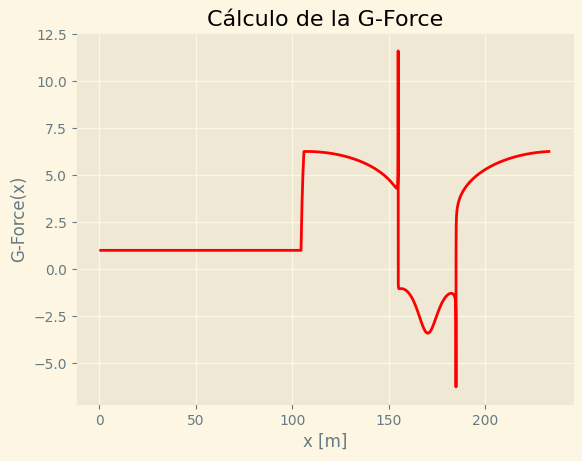

In [ ]:
g_force = []
radio_curvatura_temporal = []
df['S'] = pd.to_numeric(df['S'])

for i, S in enumerate(S_temporal):
  diferencias = np.abs(df['S'] - S)

  indice = diferencias.dropna().idxmin()

  encontrado = df['S'].iloc[indice]

  idx_s0 = None
  idx_s1 = None

  if S > encontrado:
    idx_s0 = indice
    idx_s1 = indice + 1
  else:
    idx_s0 = indice - 1
    idx_s1 = indice

  R0 = radio_curvatura[idx_s0]
  R1 = radio_curvatura[idx_s1]

  S0 = S_points[idx_s0]
  S1 = S_points[idx_s1]

  R = R0 + (((R1-R0)/(S1-S0)) * (S-S0))
  radio_curvatura_temporal.append(R)

  v_temp = velocidad[i]
  k_temp = k_temporal[i]

  g_force_actual = 1 / ((1 + k_temp**2) ** 0.5) + (v_temp ** 2) / (R * g)
  g_force.append(g_force_actual)


plt.plot(x_temp, g_force, "red")
plt.style.use('Solarize_Light2')
plt.title('Cálculo de la G-Force')
plt.xlabel('x [m]')
plt.ylabel('G-Force(x)')
plt.show()

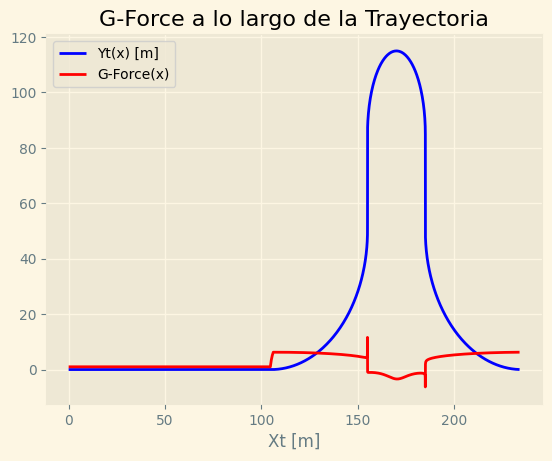

In [ ]:
plt.plot()
plt.style.use('Solarize_Light2')
plt.plot(x_temp, y_temp, 'blue', label='Yt(x) [m]')
plt.plot(x_temp, g_force, "red", label='G-Force(x)')
plt.title('G-Force a lo largo de la Trayectoria')
plt.xlabel('Xt [m]')
plt.legend(loc='upper left')
plt.show()

***Para desglosar lo que pasa en el tramo vertical (ya que X no varia), se agregó una comparacion con S, que si varia a lo largo de todo el recorrido.***

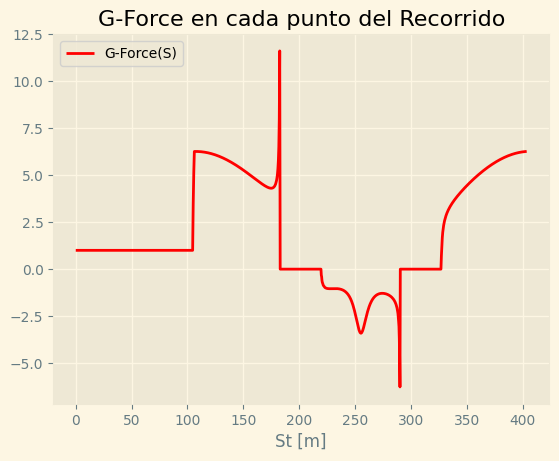

In [ ]:
plt.plot()
plt.style.use('Solarize_Light2')
plt.plot(S_temporal, g_force, "red", label='G-Force(S)')
plt.title('G-Force en cada punto del Recorrido')
plt.xlabel('St [m]')
plt.legend(loc='upper left')
plt.show()

**G-Force inicio tramo B**

In [ ]:
g_force_inicio_b = g_force[412] # inicio tramo B en la tabla temporal
print(f'G-Force en el inicio del tramo B: {g_force_inicio_b:.6f}')

G-Force en el inicio del tramo B: 1.000703


**G-Force punto más alto**

In [ ]:
g_force_punto_mas_alto = g_force[y_max_index]
print(f'G-Force en el punto más alto: {g_force_punto_mas_alto:.6f}')

G-Force en el punto más alto: -3.401501


**G-Force final**

In [ ]:
g_force_final = g_force[-1]
print(f'G-Force final: {g_force_final:.6f}')

G-Force final: 6.264867


# Roll Back (5)

In [ ]:
M = 10960
n = 0.75
A_SEMILLA_ANT = 15
A_SEMILLA = 12.3556


In [ ]:
def f(velocidad_cima, velocidad_obj):
  return velocidad_cima - velocidad_obj

def f_prima(a_actual, a_anterior, f_actual, f_anterior):
  denominator = a_actual - a_anterior
  return (f_actual - f_anterior) / denominator

In [ ]:
def calcular_tabla_temporal(ap_value, v_viento):
  S_temporal = [0]
  velocidad = [0]
  tiempo = [0]
  k_temporal = [0]
  i = 0

  while True:
    s_anterior = S_temporal[-1]
    velocidad_anterior = velocidad[-1]

    if velocidad_anterior < 0:
     break

    s_actual = s_anterior + PASO * velocidad_anterior

    if s_actual > S_points[-1]:
      break

    S_temporal.append(s_actual)

    k = calc_k(df, s_actual)
    k_temporal.append(k)


    cos = 1 / ((1 + k ** 2) ** 0.5) if not np.isinf(k) else 0

    derivada_segunda = -g * componente_vertical(k) + (ap_value if en_tramo_a(k) else 0) - (n / M) * ((velocidad_anterior - v_viento * cos) ** 2)

    v_actual = velocidad[-1] + PASO * derivada_segunda

    velocidad.append(v_actual)
    tiempo.append(tiempo[-1] + PASO)
    i += 1

  x_temp, y_temp = calcular_x_y(S_temporal,df['S'].values,df['X'].values,df['Y'].values)
  data4 = np.stack((np.array(tiempo, copy=True), np.array(S_temporal, copy=True), np.array(velocidad, copy=True), np.array(k_temporal, copy=True), np.array(x_temp, copy=True), np.array(y_temp, copy=True)), axis=1)
  dft4 = pd.DataFrame(data4, columns=('t', 'S_temp', 'v', 'k_temp', 'x_temp', 'y_temp'))
  dft4['S_temp'] = pd.to_numeric(dft4['S_temp'])
  dft4['k_temp'] = pd.to_numeric(dft4['k_temp'], errors='coerce')
  dft4['x_temp'] = pd.to_numeric(dft4['x_temp'])
  dft4['y_temp'] = pd.to_numeric(dft4['y_temp'])

  y_max_index = dft4['y_temp'].idxmax()
  velocidad_cima = dft4.loc[y_max_index, 'v']

  return velocidad_cima

In [ ]:
def calculador_ap(v_viento, V_OBJ, a_min):
  a_actual = A_SEMILLA
  a_anterior = A_SEMILLA_ANT
  v_actual = calcular_tabla_temporal(A_SEMILLA, v_viento)
  v_anterior = calcular_tabla_temporal(A_SEMILLA_ANT, v_viento)
  f_actual = f(v_anterior, V_OBJ)
  secant_iterations = 0
  max_secant_iterations = 100
  while secant_iterations < max_secant_iterations:
    velocidad_cima = calcular_tabla_temporal(a_actual, v_viento)
    v_anterior = v_actual
    v_actual = velocidad_cima
    f_anterior = f_actual
    f_actual = f(velocidad_cima, V_OBJ)
    if abs(f_actual) <= 0.01:
      break


    denominator_secant = f_prima(a_actual, a_anterior, f_actual, f_anterior)
    if abs(denominator_secant) < 1e-9:
        break

    a_siguiente = a_actual - (f_actual / denominator_secant)
    if a_siguiente < a_min:
      a_siguiente = (2*a_min + a_siguiente + a_actual)/4
    a_anterior = a_actual
    a_actual = a_siguiente
    secant_iterations += 1

    if secant_iterations == max_secant_iterations:
      break
  print(f"Iteraciones: {secant_iterations}")
  print(f"AP:          {a_actual}    m/s^2")
  print(f"V cima:      {velocidad_cima}    m/s")
  print(f"Delta V:     {f_actual} m/s")

In [ ]:
velocidad_en_cima = calcular_tabla_temporal(11.006623, 0.0)
print(velocidad_en_cima)

0.01377201955517983


In [ ]:
velocidad_en_cima = calcular_tabla_temporal(11.033197, -5.0)
print(velocidad_en_cima)

0.013938317908142291


In [ ]:
velocidad_en_cima = calcular_tabla_temporal(11.063962, -10.0)
print(velocidad_en_cima)

0.0045520318636730825


***Para impulsos menores al "a_min", el carrito no llega a la cima.***
**11,065 cubre el impulso minimo en los 3 casos.**

In [ ]:
a_min = 11.065

Caso 1:

In [ ]:
v_viento = 0.0
V_OBJ = 10.0
calculador_ap(v_viento, V_OBJ, a_min)

Iteraciones: 7
AP:          11.487570663311477    m/s^2
V cima:      10.00406192294161    m/s
Delta V:     0.004061922941609453 m/s


Caso 2:

In [ ]:
v_viento = -5.0
V_OBJ = 10.0
calculador_ap(v_viento, V_OBJ, a_min)

Iteraciones: 5
AP:          11.514693822704412    m/s^2
V cima:      10.001235813016905    m/s
Delta V:     0.0012358130169047854 m/s


Caso 3:

In [ ]:
v_viento = -10.0
V_OBJ = 5.0
calculador_ap(v_viento, V_OBJ, a_min)

Iteraciones: 8
AP:          11.202601263799894    m/s^2
V cima:      4.9971394748503775    m/s
Delta V:     -0.0028605251496225392 m/s
